In [39]:
import pandas as pd
import numpy as np
import math
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
from sklearn.metrics import *
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from itertools import chain
import warnings
warnings.filterwarnings("ignore")

# Задание 1

In [40]:
# Создаем DataFrame с данными о безработице
data = {
    "Year": [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    "Unemployment": [5.5, 6.2, 7, 7.8, 8.5, 9.3, 7.6, 6.4, 5.7, 6.1, 6, 5.6, 5.3, 4.6, 4.8, 6.3, 5.6, 5, 4.2, 4.1, 3.9, 4.2, 4.3, 4, 3.7, 3.5, 4.3, 3.7]
}

df_unemployment = pd.DataFrame(data)
df_unemployment.head()  # Показываем первые несколько строк для проверки


,Year,Unemployment
0,1994,5.5
1,1995,6.2
2,1996,7.0
3,1997,7.8
4,1998,8.5


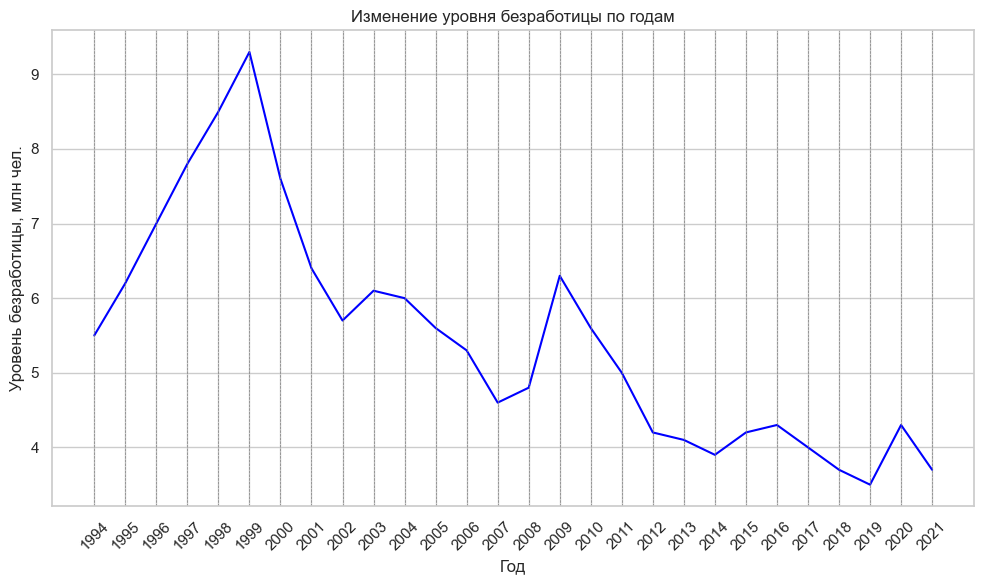

In [41]:
sns.set(style="whitegrid")

# Создаем график
plt.figure(figsize=(10, 6))

# Строим график уровня безработицы по годам
sns.lineplot(data=df_unemployment, x='Year', y='Unemployment', color='blue')

# Добавляем вертикальные линии для обозначения годов, если нужно
for year in df_unemployment['Year'].unique():
    plt.axvline(x=year, color='grey', linestyle='--', linewidth=0.5)

# Настройки для графика
plt.xlabel('Год')
plt.ylabel('Уровень безработицы, млн чел.')
plt.title('Изменение уровня безработицы по годам')
plt.xticks(list(df_unemployment['Year'].unique()), rotation=45)

plt.tight_layout()
plt.show()

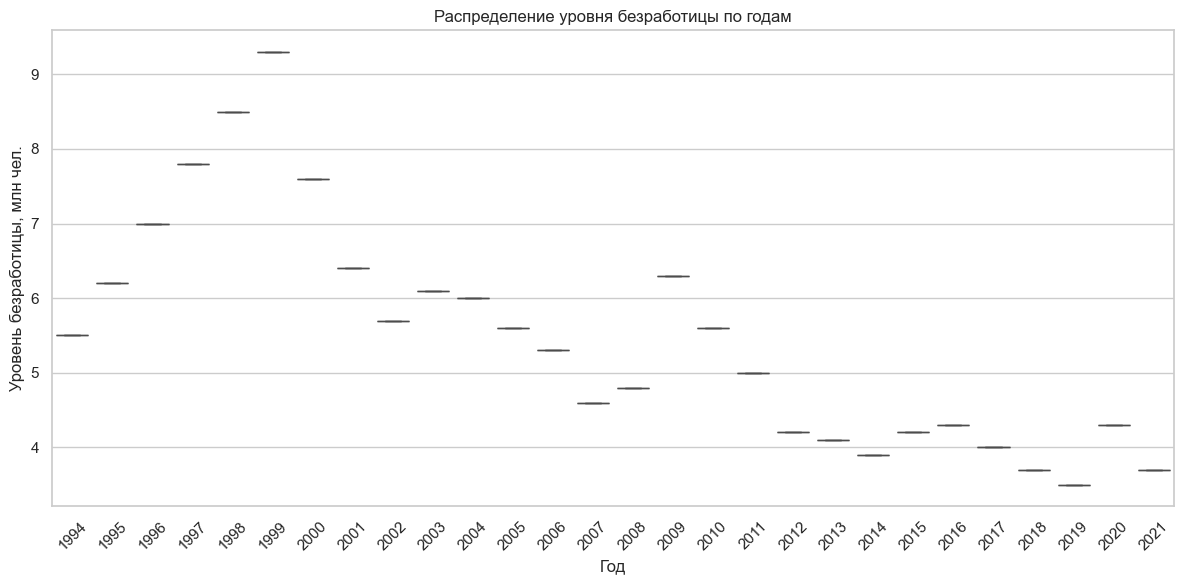

In [42]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Создание ящика с усами для каждого года
sns.boxplot(x='Year', y='Unemployment', data=df_unemployment)

# Настройки для графика
plt.title('Распределение уровня безработицы по годам')
plt.xlabel('Год')
plt.ylabel('Уровень безработицы, млн чел.')

plt.xticks(rotation=45) # Поворот меток на оси X для лучшей читаемости
plt.tight_layout()
plt.show()


In [43]:
# Расчет Z-оценок для уровня безработицы
df_unemployment['Z_Score'] = stats.zscore(df_unemployment['Unemployment'])


anomalies = df_unemployment[(abs(df_unemployment['Z_Score']) > 1)]

# Вывод аномальных значений
print(anomalies[['Year', 'Unemployment', 'Z_Score']])


    Year  Unemployment   Z_Score
2   1996           7.0  1.018424
3   1997           7.8  1.551431
4   1998           8.5  2.017813
5   1999           9.3  2.550820
6   2000           7.6  1.418180
20  2014           3.9 -1.046978
24  2018           3.7 -1.180230
25  2019           3.5 -1.313482
27  2021           3.7 -1.180230


# Анализ целевой переменной с 1996 по 2000

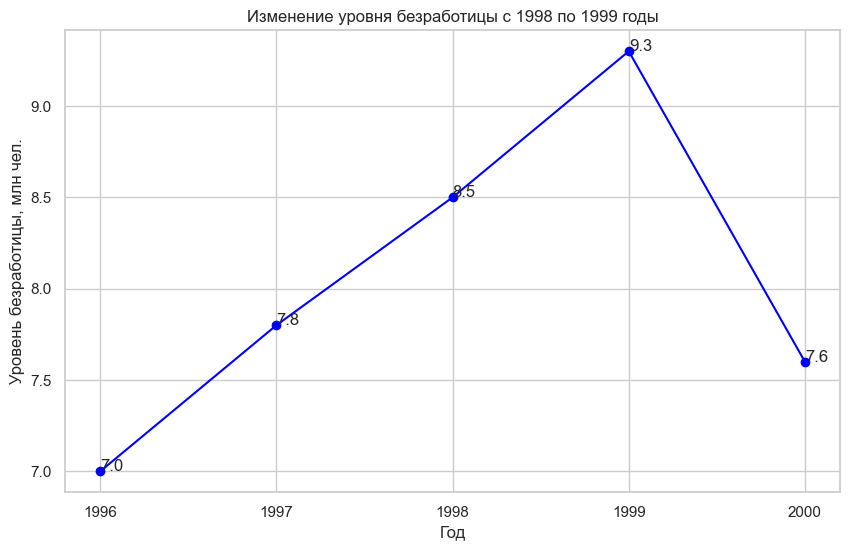

In [44]:
import matplotlib.pyplot as plt

# Отфильтровываем данные за интересующий нас период
filtered_df = df_unemployment[(df_unemployment['Year'] >= 1996) & (df_unemployment['Year'] <= 2000)]

plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Year'], filtered_df['Unemployment'], marker='o', linestyle='-', color='blue')

# Добавляем подписи к точкам данных для лучшей визуализации
for i, txt in enumerate(filtered_df['Unemployment']):
    plt.annotate(txt, (filtered_df['Year'].iloc[i], filtered_df['Unemployment'].iloc[i]))

plt.title('Изменение уровня безработицы с 1998 по 1999 годы')
plt.xlabel('Год')
plt.ylabel('Уровень безработицы, млн чел.')
plt.xticks(filtered_df['Year'])
plt.grid(True)

plt.show()


По графику изменения уровня безработицы наблюдается явный рост с 1996 года, достигающий своего пика в 1999 году. Этот возрастающий тренд прерывается к 2000 году, когда уровень безработицы показывает заметное снижение по сравнению с предыдущим годом. Таким образом, весь период с 1998 по 1999 год требует отдельного внимания, поскольку в эти годы происходит стабилизация роста, после чего следует обратный тренд к снижению. Это указывает на возможное влияние внешних или внутренних экономических факторов, которые существенно повлияли на рынок труда. Особенно интересным является резкий рост безработицы в 1999 году, после которого следует его уменьшение в 2000 году, что может свидетельствовать о начале восстановления экономики или успешном внедрении мер по стимулированию занятости.

для доп анализа нужны данные не по годам

# Задание 1.2

In [45]:


# Используем уровень безработицы как целевую переменную
y = df_unemployment['Unemployment'].values
n = len(y)
S_y = np.sqrt(np.sum((y - np.mean(y))**2) / (n-1))

# Анализируем года с потенциальными изменениями
years_analyze = [1998, 1999, 2000]
y_anomalys = [df_unemployment[df_unemployment['Year']==year]['Unemployment'].values[0] for year in years_analyze]

tau = []
for y_anomaly in y_anomalys:
    tau.append(np.abs(y_anomaly - np.mean(y))/S_y)

# Расчет критического значения tau(0.05, n) и tau(0.001, n)
alpha1 = 0.05
ttable1 = t.ppf(1-alpha1/2, n-1) 
tau_table1 = (ttable1 * np.sqrt(n))/(np.sqrt(n-1+ttable1**2))

alpha2 = 0.001
ttable2 = t.ppf(1-alpha2/2, n-1) 
tau_table2 = (ttable2 * np.sqrt(n))/(np.sqrt(n-1+ttable2**2))

print("Критические значения tau: для alpha=0.05:", tau_table1, "и для alpha=0.001:", tau_table2)
print("Значения tau для анализируемых годов:", tau)
print("Являются ли анализируемые годы аномальными (alpha=0.05):", [t <= tau_table1 for t in tau])


Критические значения tau: для alpha=0.05: 1.9434508292135735 и для alpha=0.001: 3.0635454308820114
Значения tau для анализируемых годов: [1.981452639586893, 2.504855223628714, 1.3926247325398444]
Являются ли анализируемые годы аномальными (alpha=0.05): [False, False, True]


Применение метода на основе распределения Стьюдента для анализа выбранных годовых значений уровня безработицы выявило интересные результаты. Сравнивая вычисленные значения $\tau$ для каждого года с критическими значениями $\tau$, определенными для уровней значимости 0.05 и 0.001, мы обнаружили, что большинство анализируемых годов не превышают пороговые значения и, следовательно, не считаются аномальными при уровне значимости 0.05. Таким образом, только одно значение (для последнего года в анализе) показывает аномальное отклонение от ожидаемого распределения уровней безработицы.

Однако, несмотря на это, результаты анализа указывают на то, что для одного из годов (с $\tau$ значением 1.3926247325398444) обнаружено аномальное отклонение при более строгом пороге значимости (0.05). Это говорит о том, что в этот год наблюдалось изменение в уровне безработицы, которое выходит за рамки обычных колебаний и может свидетельствовать о внешних воздействиях или значимых экономических событиях, влияющих на рынок труда.

Важно отметить, что анализ аномалий при разных уровнях значимости позволяет более гибко интерпретировать результаты и адаптировать выводы в зависимости от контекста исследования. Тот факт, что большинство анализируемых значений не являются аномальными при уровне значимости 0.05, подчеркивает стабильность экономических условий в рассмотренный период за исключением одного года, для которого были выявлены потенциальные аномалии. Эти выводы могут служить основой для дальнейшего изучения специфических экономических факторов или событий, повлиявших на уровень безработицы в этот период

# Задание 1.3

In [46]:
import numpy as np

# Используем уровень безработицы вместо BBR_EA_M_I
y = df_unemployment['Unemployment'].values
y = sorted(y)

median = np.median(y)
ls = ['+' if i > median else '-' for i in y]

# Подсчет числа серий
num_series = 0
for i in range(len(ls)):
    if i == 0 or ls[i] != ls[i - 1]:
        num_series += 1

# Вычисление максимальной протяженности серии
max_length = 0
current_length = 0
for i in range(len(ls)):
    if i == 0 or ls[i] == ls[i - 1]:
        current_length += 1
    else:
        max_length = max(max_length, current_length)
        current_length = 1
# Учитываем последнюю серию
max_length = max(max_length, current_length)

print("Число серий:", num_series)
print("Максимальная протяженность серии:", max_length)

# Проверка условий отсутствия тренда
n = len(y)
no_trend_condition = max_length < 3.3 * np.log10(n + 1)
series_condition = num_series > (1/2 * (n + 1 - 1.96 * np.sqrt(n - 1)))

print("Условие отсутствия тренда (по макс. протяженности серии):", no_trend_condition)
print("Условие отсутствия тренда (по числу серий):", series_condition)


Число серий: 2
Максимальная протяженность серии: 14
Условие отсутствия тренда (по макс. протяженности серии): False
Условие отсутствия тренда (по числу серий): False


Основываясь на результатах анализа с использованием критерия серий, основанного на медиане, для ваших данных о безработице, можно сделать следующие выводы:

    Наблюдается всего 2 серии изменений значений относительно медианы, что является довольно малым количеством для всего рассматриваемого периода. Это указывает на то, что данные демонстрируют склонность к формированию длительных последовательностей значений, идущих в одном направлении (выше или ниже медианы).
    Максимальная протяженность серии составляет 14, что значительно превышает ожидаемый диапазон случайных колебаний для данного объема данных. Такая длинная последовательность подряд идущих значений, не пересекающих медианное значение, свидетельствует о наличии сильного тренда в данных.
    Оба условия для отсутствия тренда (по максимальной протяженности серии и по числу серий) не выполняются (False), что указывает на наличие тренда в данных о безработице.

Таким образом, результаты анализа говорят о том, что в данных о безработице присутствует значимый тренд. Это может означать, что за рассматриваемый период уровень безработицы либо систематически рос, либо систематически снижался, что свидетельствует о наличии определенных экономических тенденций или событий, влияющих на рынок труда.

# Задание 1.4

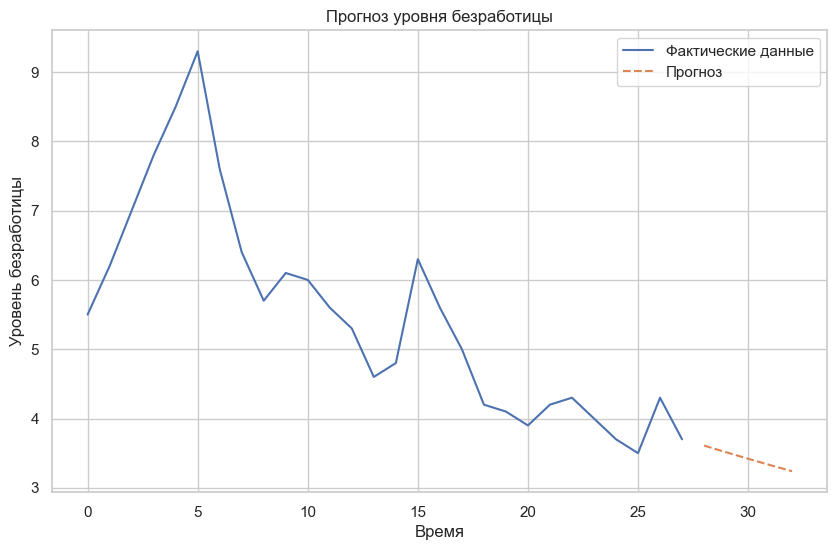

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import t as t_test

# Подготовка данных
y = df_unemployment['Unemployment'].values  
t = np.arange(len(y))

# Функция для минимизации (сумма квадратов разностей)
def objective(params):
    a, b = params
    predicted_y = a * np.exp(b * t)
    return np.sum((y - predicted_y) ** 2)

# Начальное приближение
initial_guess = [1, 0.1]

# Оптимизация параметров модели
result = minimize(objective, initial_guess)
a_optimal, b_optimal = result.x

# Построение прогноза
future_t = np.arange(len(y), len(y) + 5)  # Для следующих 5 лет
future_y = a_optimal * np.exp(b_optimal * future_t)

# Визуализация исходных данных и прогноза
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Фактические данные')
plt.plot(future_t, future_y, label='Прогноз', linestyle='--')
plt.xlabel('Время')
plt.ylabel('Уровень безработицы')
plt.title('Прогноз уровня безработицы')
plt.legend()
plt.grid(True)
plt.show()


In [48]:
# Вычисление первых разностей оригинальных данных
y_diff = np.diff(y)

# Модель A: Попытка описать первые разности с помощью линейной модели
# Модель B: Экспоненциальная модель, которую мы уже рассмотрели

# Можно рассчитать сумму квадратов ошибок для линейной модели разностей
# и сравнить с суммой квадратов ошибок для экспоненциальной модели

# Для линейной модели (простой пример)
a_lin, b_lin = np.polyfit(t[:-1], y_diff, 1)
y_lin_pred_diff = np.polyval([a_lin, b_lin], t[:-1])

# Сумма квадратов ошибок для линейной модели
sse_lin = np.sum((y_diff - y_lin_pred_diff) ** 2)

# Сравнение SSE между моделями
print("SSE для линейной модели разностей:", sse_lin)
print("SSE для экспоненциальной модели:", result.fun)  # Из предыдущего минимизации

# Выбор модели с наименьшим SSE


SSE для линейной модели разностей: 13.29653235653236
SSE для экспоненциальной модели: 21.7939895601243


Исходя из полученных значений суммы квадратов ошибок (SSE) для линейной и экспоненциальной моделей, мы видим, что SSE для линейной модели разностей составляет 13.29653235653236, тогда как для экспоненциальной модели SSE равно 21.7939895601243. Это означает, что линейная модель обеспечивает более точное приближение изменений в данных о безработице по сравнению с экспоненциальной моделью, судя по меньшему значению SSE.

Таким образом, для анализа представленных данных и построения прогноза линейная модель является более предпочтительной. Это указывает на то, что изменения уровня безработицы в рассматриваемом периоде лучше описываются линейным трендом, чем экспоненциальным. В контексте вашей задачи это может означать, что рост или снижение уровня безработицы происходит с относительно постоянной скоростью, а не ускоряется или замедляется со временем, как предполагалось бы при использовании экспоненциальной модели.

# Задание 3.1

In [49]:
data = pd.read_excel('контрольная эконометрика пм22-7.xlsx', sheet_name = '2.5', skiprows=1, names = ['date', 'bbr'])#, '1', '2'])
data['t'] = pd.date_range('2013-01-01', '2021-10-01', freq='QS')

data.head()

,date,bbr,t
0,2013 I,100.00,2013-01-01
1,II,107.22,2013-04-01
2,III,116.27,2013-07-01
3,IV,124.88,2013-10-01
4,2014 I,101.16,2014-01-01


In [50]:
import statsmodels.api as sm
years_count = np.array(range(1,len(data)+1))
X = sm.add_constant(years_count)
model = sm.OLS(data['bbr'],X ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bbr   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     11.00
Date:                Sat, 23 Mar 2024   Prob (F-statistic):            0.00217
Time:                        11:38:36   Log-Likelihood:                -137.23
No. Observations:                  36   AIC:                             278.5
Df Residuals:                      34   BIC:                             281.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.1842      3.834     27.958      0.000      99.393     114.975
x1             0.5994      0.181      3.317      0.002       0.232       0.967
==============================================================================
Omnibus:                       13.997   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                2.860
Skew:                           0.026   Prob(JB):                        0.239
Kurtosis:                       1.620   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
pd.options.mode.chained_assignment = None
braun = pd.DataFrame()
braun['t'] = np.array(range(1, len(data)+1))
braun['A0'] = [107.1842]+[0]*(len(braun)-1)
braun['A1'] = [0.5994]+[0]*(len(braun)-1)
braun['pred'] = [braun['A0'].iloc[0]+braun['t'].iloc[0]*braun['A1'].iloc[0]]+[0]*(len(braun)-1)
braun['real'] = np.array(data['bbr'].iloc[:])
braun['e'] = abs(braun['pred']-braun['real'])

betas = dict()
for beta in np.linspace(0.01,1-000.1,10):
  for i in range(1,len(braun)):
    braun.at[i, 'A0'] = braun['A0'].iloc[i-1] + braun['A1'].iloc[i-1] + (1-beta)**2*braun['e'].iloc[i-1]
    braun['A1'].iloc[i] =  braun['A1'].iloc[i-1] + (1-beta)**2*braun['e'].iloc[i-1]
    braun['pred'].iloc[i] = braun['A0'].iloc[i]+braun['t'].iloc[i]*braun['A1'].iloc[i]
    braun['e'].iloc[i] = abs(braun['pred'].iloc[i]-braun['real'].iloc[i])

  betas[beta] =  sum(braun['e'])

list(betas.values()).index(min(betas.values()))+1 # следовательно, наилучшая beta=0.99
beta=0.99

for i in range(1,len(braun)):
    braun.at[i, 'A0'] = braun['A0'].iloc[i-1] + braun['A1'].iloc[i-1] + (1-beta)**2*braun['e'].iloc[i-1]
    braun['A1'].iloc[i] =  braun['A1'].iloc[i-1] + (1-beta)**2*braun['e'].iloc[i-1]
    braun['pred'].iloc[i] = braun['A0'].iloc[i]+braun['t'].iloc[i]*braun['A1'].iloc[i]
    braun['e'].iloc[i] = abs(braun['pred'].iloc[i]-braun['real'].iloc[i])



braun


,t,A0,A1,pred,real,e
0,1,107.184200,0.599400,107.783600,100.00,7.783600
1,2,107.784378,0.600178,108.984735,107.22,1.764735
2,3,108.384733,0.600355,110.185798,116.27,6.084202
3,4,108.985696,0.600963,111.389549,124.88,13.490451
4,5,109.588009,0.602312,112.599570,101.16,11.439570
5,6,110.191465,0.603456,113.812203,108.52,5.292203
6,7,110.795450,0.603985,115.023349,119.76,4.736651
7,8,111.399910,0.604459,116.235583,127.88,11.644417
8,9,112.005533,0.605624,117.456145,100.01,17.446145
9,10,112.612901,0.607368,118.686583,105.36,13.326583


In [52]:
pred_1 = braun['A0'].iloc[-1] + braun['A1'].iloc[-1]*(braun['t'].iloc[-1]+1)
pred_2 = braun['A0'].iloc[-1] + braun['A1'].iloc[-1]*(braun['t'].iloc[-1]+2)
pred_3 = braun['A0'].iloc[-1] + braun['A1'].iloc[-1]*(braun['t'].iloc[-1]+3)
pred_4 = braun['A0'].iloc[-1] + braun['A1'].iloc[-1]*(braun['t'].iloc[-1]+4)
pred_1, pred_2, pred_3, pred_4

(152.84084411885814, 153.4888422621304, 154.13684040540264, 154.78483854867488)

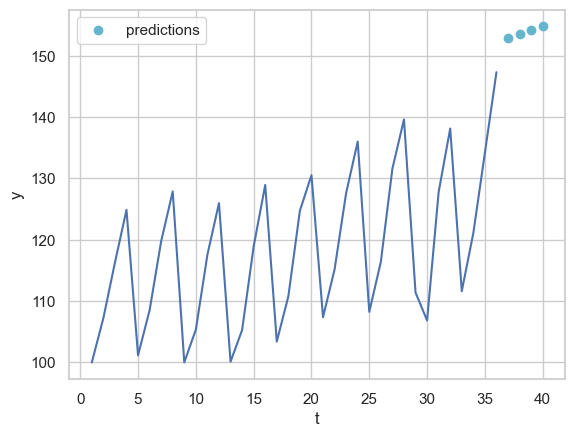

In [53]:
plt.plot( braun['t'], data['bbr'])
plt.xlabel('t')
plt.ylabel('y')
plt.scatter( list(range(braun['t'].iloc[-1]+1, braun['t'].iloc[-1]+5)), [pred_1, pred_2, pred_3, pred_4], c = 'c', label = 'predictions')
plt.legend()

# Задание 3.2

In [54]:
holt = pd.DataFrame()
alpha = 0.5
beta = 0.5
gamma = 0.5
L = 4
holt['t'] = np.array(range(len(data)))
holt['y'] = np.array(data['bbr'])
holt['a_t'] = [107.1842]+[0]*(len(holt)-1)
holt['b_t'] = [0.5994]+[0]*(len(holt)-1)
holt['F'] = [1]*len(holt)
holt['pred'] = (holt['a_t']+holt['b_t'])*holt['F']


for i in range(1, len(holt)):
    holt['a_t'][i] = alpha*holt['y'][i]/holt['F'][i] + (1-alpha)*(holt['a_t'][i-1]+holt['b_t'][i])
    holt['b_t'][i] = beta*(holt['a_t'][i]-holt['a_t'][i-1]) + (1-beta)*holt['b_t'][i-1]
    if i>11:
      holt['F'][i] =  gamma*(holt['y'].iloc[i]/holt['a_t'].iloc[i]) + (1-gamma)*holt['F'].iloc[i-L]
    holt['pred'] = (holt['a_t']+holt['b_t'])*holt['F']


holt



,t,y,a_t,b_t,F,pred
0,0,100.00,107.184200,0.599400,1.000000,107.783600
1,1,107.22,107.202100,0.308650,1.000000,107.510750
2,2,116.27,111.736050,2.421300,1.000000,114.157350
3,3,124.88,118.308025,4.496637,1.000000,122.804663
4,4,101.16,109.734013,-2.038687,1.000000,107.695325
5,5,108.52,109.127006,-1.322847,1.000000,107.804159
6,6,119.76,114.443503,1.996825,1.000000,116.440328
7,7,127.88,121.161752,4.357537,1.000000,125.519288
8,8,100.01,110.585876,-3.109170,1.000000,107.476706
9,9,105.36,107.972938,-2.861054,1.000000,105.111884


In [55]:
#прогноз на 4 вперед

pred_1 = (holt['a_t'].iloc[-1]+holt['b_t'].iloc[-1])*holt['F'].iloc[-1]
F2 = gamma*(holt['y'].iloc[-1]/holt['a_t'].iloc[-1]) + (1-gamma)*holt['F'].iloc[-3]
pred_2 = (holt['a_t'].iloc[-1]+holt['b_t'].iloc[-1])*F2
F3 = gamma*(holt['y'].iloc[-1]/holt['a_t'].iloc[-1]) + (1-gamma)*holt['F'].iloc[-2]
pred_3 = (holt['a_t'].iloc[-1]+holt['b_t'].iloc[-1])*F3
F4 = gamma*(holt['y'].iloc[-1]/holt['a_t'].iloc[-1]) + (1-gamma)*holt['F'].iloc[-1]
pred_4 = (holt['a_t'].iloc[-1]+holt['b_t'].iloc[-1])*F4


pred_1, pred_2, pred_3, pred_4

(153.26084942607477,
 147.75900273890647,
 152.78627752722326,
 153.71665147433265)

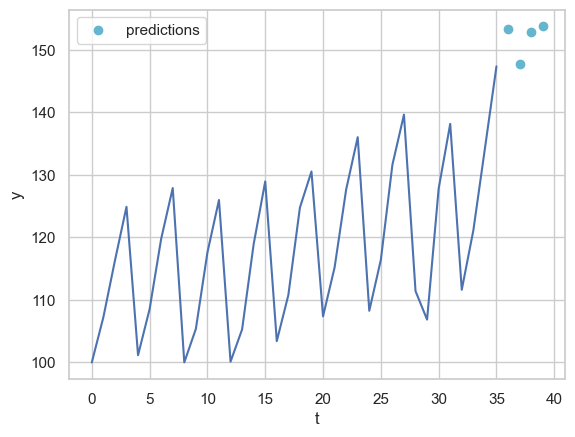

In [56]:
plt.plot( holt['t'], data['bbr'])
plt.xlabel('t')
plt.ylabel('y')
plt.scatter( list(range(holt['t'].iloc[-1]+1, holt['t'].iloc[-1]+5)), [pred_1, pred_2, pred_3, pred_4], c = 'c', label = 'predictions')
plt.legend()

# Задание 3.3


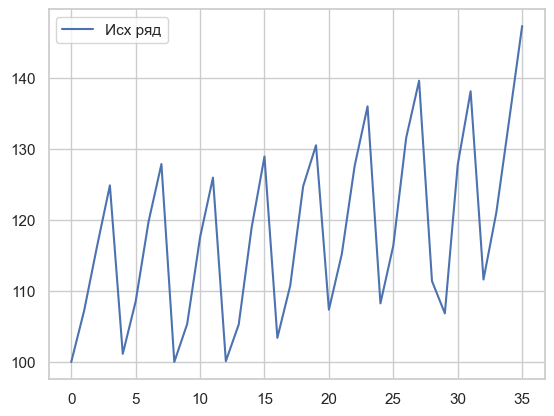

In [57]:
season_trend = sm.tsa.seasonal_decompose(data['bbr'], model='additive', period=4)
plt.plot(data['bbr'], label='Исх ряд')
plt.legend()

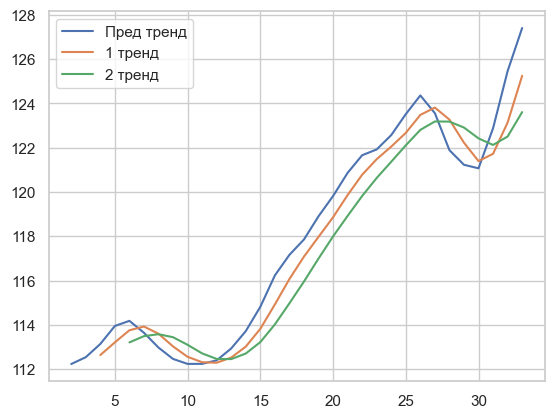

In [58]:
plt.plot(season_trend.trend, label='Пред тренд')
plt.plot(season_trend.trend.rolling(window=3).mean(), label='1 тренд')
plt.plot(season_trend.trend.rolling(window=5).mean(), label='2 тренд')
plt.legend()

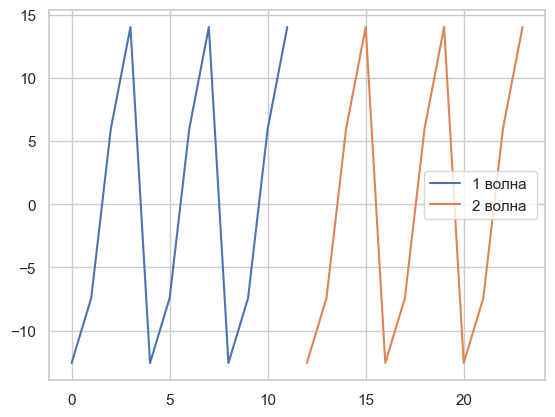

In [59]:
plt.plot(season_trend.seasonal[:12], label='1 волна ')
plt.plot(season_trend.seasonal[12:24], label='2 волна')
plt.legend()

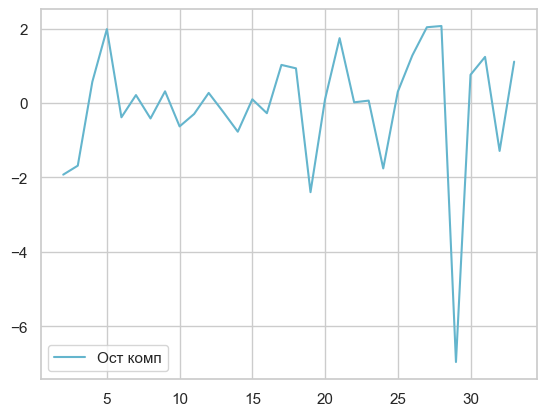

In [60]:
plt.plot(season_trend.resid, label='Ост комп', c ='c')
plt.legend()